# 数据点和特征如何转换为矩阵？

## 📚 核心概念

- **数据点** = 一条记录 = 一个样本 = 矩阵的一行
- **特征** = 一个属性 = 一个维度 = 矩阵的一列
- **矩阵维度** = (数据点数量) × (特征数量)

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# 设置中文显示
plt.rcParams['font.sans-serif'] = ['SimHei', 'Arial Unicode MS', 'DejaVu Sans']
plt.rcParams['axes.unicode_minus'] = False

## 🎯 例子1: 简单线性回归 (1个特征)

**场景:** 根据学习时间预测考试分数

3个数据点, 1个特征(学习时间) + 1个常数项 = 2列

In [4]:
# 原始数据
data1 = pd.DataFrame({
    '学生': ['张三', '李四', '王五'],
    '学习时间(小时)': [1, 2, 3],
    '考试分数': [3, 5, 7]
})

print("原始数据表格:")
print(data1)
print("\n数据点数量:", len(data1))
print("特征数量: 1 (学习时间) + 1 (常数项) = 2")

原始数据表格:
   学生  学习时间(小时)  考试分数
0  张三         1     3
1  李四         2     5
2  王五         3     7

数据点数量: 3
特征数量: 1 (学习时间) + 1 (常数项) = 2


In [5]:
# 转换为矩阵
X1 = data1[['学习时间(小时)']].values  # 提取特征
X1 = np.c_[X1, np.ones(len(X1))]      # 添加常数项列
y1 = data1['考试分数'].values

print("特征矩阵 X:")
print("        学习时间  常数项")
for i, row in enumerate(X1):
    print(f"数据点{i+1}:  {row[0]:.0f}       {row[1]:.0f}")

print(f"\n矩阵X的形状: {X1.shape} → {X1.shape[0]}个数据点, {X1.shape[1]}个特征")

print("\n目标向量 y:")
print(y1)
print(f"向量y的形状: {y1.shape}")

print("\n\n用矩阵形式表示:")
print("X =")
print(X1)
print("\ny =")
print(y1.reshape(-1, 1))

特征矩阵 X:
        学习时间  常数项
数据点1:  1       1
数据点2:  2       1
数据点3:  3       1

矩阵X的形状: (3, 2) → 3个数据点, 2个特征

目标向量 y:
[3 5 7]
向量y的形状: (3,)


用矩阵形式表示:
X =
[[1. 1.]
 [2. 1.]
 [3. 1.]]

y =
[[3]
 [5]
 [7]]


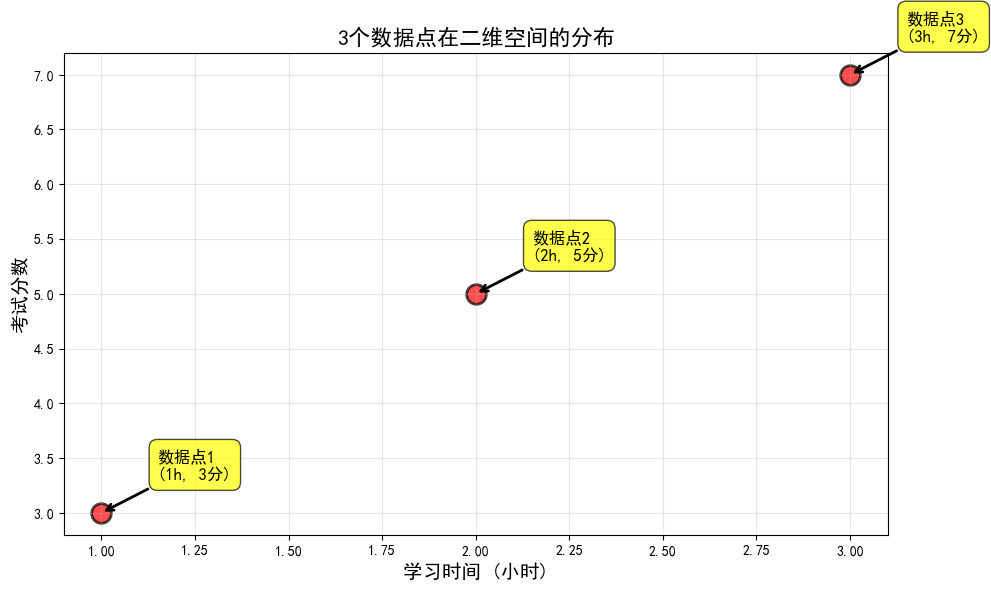

📊 图中每个红点 = 一个数据点
📊 横坐标 = 特征值(学习时间)
📊 纵坐标 = 目标值(分数)


In [6]:
# 可视化数据点
plt.figure(figsize=(10, 6))
plt.scatter(X1[:, 0], y1, s=200, c='red', marker='o', edgecolors='black', linewidths=2, alpha=0.7)

for i, (x, y) in enumerate(zip(X1[:, 0], y1)):
    plt.annotate(f'数据点{i+1}\n({x:.0f}h, {y}分)', 
                xy=(x, y), xytext=(x+0.15, y+0.3),
                fontsize=12, ha='left',
                bbox=dict(boxstyle='round,pad=0.5', facecolor='yellow', alpha=0.7),
                arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=0', lw=2))

plt.xlabel('学习时间 (小时)', fontsize=14, fontweight='bold')
plt.ylabel('考试分数', fontsize=14, fontweight='bold')
plt.title('3个数据点在二维空间的分布', fontsize=16, fontweight='bold')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print("📊 图中每个红点 = 一个数据点")
print("📊 横坐标 = 特征值(学习时间)")
print("📊 纵坐标 = 目标值(分数)")

## 🏠 例子2: 多元线性回归 (2个特征)

**场景:** 根据房屋面积和房龄预测房价

4个数据点, 2个特征(面积、房龄) + 1个常数项 = 3列

In [7]:
# 原始数据
data2 = pd.DataFrame({
    '房屋编号': ['房子1', '房子2', '房子3', '房子4'],
    '面积(㎡)': [80, 100, 120, 90],
    '房龄(年)': [5, 3, 8, 2],
    '价格(万元)': [300, 350, 320, 340]
})

print("原始数据表格:")
print(data2)
print("\n数据点数量:", len(data2))
print("特征数量: 2 (面积、房龄) + 1 (常数项) = 3")

原始数据表格:
  房屋编号  面积(㎡)  房龄(年)  价格(万元)
0  房子1     80      5     300
1  房子2    100      3     350
2  房子3    120      8     320
3  房子4     90      2     340

数据点数量: 4
特征数量: 2 (面积、房龄) + 1 (常数项) = 3


In [8]:
# 转换为矩阵
X2 = data2[['面积(㎡)', '房龄(年)']].values
X2 = np.c_[X2, np.ones(len(X2))]  # 添加常数项
y2 = data2['价格(万元)'].values

print("特征矩阵 X:")
print("        面积   房龄  常数项")
for i, row in enumerate(X2):
    print(f"数据点{i+1}:  {row[0]:.0f}    {row[1]:.0f}     {row[2]:.0f}")

print(f"\n矩阵X的形状: {X2.shape} → {X2.shape[0]}个数据点, {X2.shape[1]}个特征")

print("\n目标向量 y:")
print(y2)
print(f"向量y的形状: {y2.shape}")

print("\n\n完整矩阵形式:")
print("X =")
print(X2)
print("\ny =")
print(y2.reshape(-1, 1))

特征矩阵 X:
        面积   房龄  常数项
数据点1:  80    5     1
数据点2:  100    3     1
数据点3:  120    8     1
数据点4:  90    2     1

矩阵X的形状: (4, 3) → 4个数据点, 3个特征

目标向量 y:
[300 350 320 340]
向量y的形状: (4,)


完整矩阵形式:
X =
[[ 80.   5.   1.]
 [100.   3.   1.]
 [120.   8.   1.]
 [ 90.   2.   1.]]

y =
[[300]
 [350]
 [320]
 [340]]


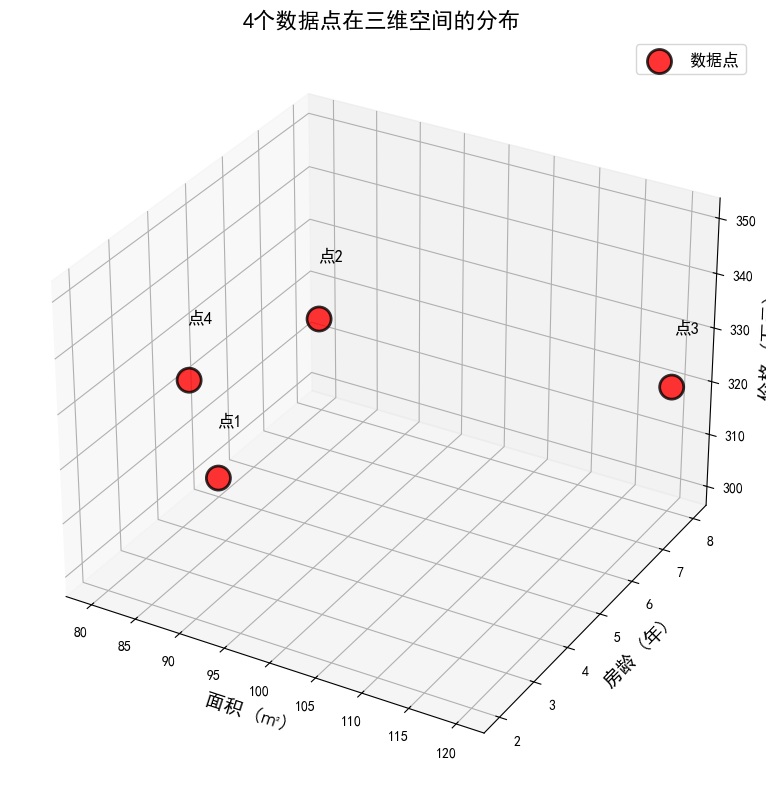

📊 图中每个红点 = 一个数据点
📊 X轴 = 特征1(面积)
📊 Y轴 = 特征2(房龄)
📊 Z轴 = 目标值(价格)


In [9]:
# 3D可视化
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# 绘制数据点
ax.scatter(X2[:, 0], X2[:, 1], y2, s=300, c='red', marker='o', 
           edgecolors='black', linewidths=2, alpha=0.8, label='数据点')

# 标注每个点
for i, (x, y, z) in enumerate(zip(X2[:, 0], X2[:, 1], y2)):
    ax.text(x, y, z+10, f'点{i+1}', fontsize=12, fontweight='bold')

ax.set_xlabel('面积 (㎡)', fontsize=14, fontweight='bold')
ax.set_ylabel('房龄 (年)', fontsize=14, fontweight='bold')
ax.set_zlabel('价格 (万元)', fontsize=14, fontweight='bold')
ax.set_title('4个数据点在三维空间的分布', fontsize=16, fontweight='bold')
ax.legend(fontsize=12)

plt.tight_layout()
plt.show()

print("📊 图中每个红点 = 一个数据点")
print("📊 X轴 = 特征1(面积)")
print("📊 Y轴 = 特征2(房龄)")
print("📊 Z轴 = 目标值(价格)")

## 🔢 矩阵乘法的物理意义

### Xw = y 表示什么？

In [10]:
# 使用房价例子
print("矩阵方程: Xw = y")
print("\n展开形式:")
print("[80   5   1]   [w1]   [300]")
print("[100  3   1] × [w2] = [350]")
print("[120  8   1]   [b ]   [320]")
print("[90   2   1]          [340]")

print("\n每一行代表一个数据点的方程:")
print("数据点1: 80×w1 + 5×w2 + 1×b = 300")
print("数据点2: 100×w1 + 3×w2 + 1×b = 350")
print("数据点3: 120×w1 + 8×w2 + 1×b = 320")
print("数据点4: 90×w1 + 2×w2 + 1×b = 340")

print("\n翻译成人话:")
print("价格 = (面积系数 × 面积) + (房龄系数 × 房龄) + 基础价")

矩阵方程: Xw = y

展开形式:
[80   5   1]   [w1]   [300]
[100  3   1] × [w2] = [350]
[120  8   1]   [b ]   [320]
[90   2   1]          [340]

每一行代表一个数据点的方程:
数据点1: 80×w1 + 5×w2 + 1×b = 300
数据点2: 100×w1 + 3×w2 + 1×b = 350
数据点3: 120×w1 + 8×w2 + 1×b = 320
数据点4: 90×w1 + 2×w2 + 1×b = 340

翻译成人话:
价格 = (面积系数 × 面积) + (房龄系数 × 房龄) + 基础价


## 📐 最小二乘法求解

In [11]:
# 方法1: 公式法 (使用转置)
w_formula = np.linalg.inv(X2.T @ X2) @ X2.T @ y2

print("使用最小二乘法求解: w = (X^T·X)^(-1)·X^T·y")
print("\n求解结果:")
print(f"w1 (面积系数) = {w_formula[0]:.4f} 万元/㎡")
print(f"w2 (房龄系数) = {w_formula[1]:.4f} 万元/年")
print(f"b  (基础价格) = {w_formula[2]:.4f} 万元")

print("\n预测公式:")
print(f"价格 = {w_formula[0]:.4f}×面积 + {w_formula[1]:.4f}×房龄 + {w_formula[2]:.4f}")

使用最小二乘法求解: w = (X^T·X)^(-1)·X^T·y

求解结果:
w1 (面积系数) = 1.3184 万元/㎡
w2 (房龄系数) = -10.3363 万元/年
b  (基础价格) = 245.4709 万元

预测公式:
价格 = 1.3184×面积 + -10.3363×房龄 + 245.4709


In [12]:
# 验证预测
y_pred = X2 @ w_formula

print("真实值 vs 预测值对比:")
comparison = pd.DataFrame({
    '房屋': data2['房屋编号'],
    '面积': X2[:, 0],
    '房龄': X2[:, 1],
    '真实价格': y2,
    '预测价格': y_pred,
    '误差': y2 - y_pred
})
print(comparison)

print(f"\n平均误差: {np.abs(y2 - y_pred).mean():.2f}万元")

真实值 vs 预测值对比:
    房屋     面积   房龄  真实价格        预测价格        误差
0  房子1   80.0  5.0   300  299.260090  0.739910
1  房子2  100.0  3.0   350  346.300448  3.699552
2  房子3  120.0  8.0   320  320.986547 -0.986547
3  房子4   90.0  2.0   340  343.452915 -3.452915

平均误差: 2.22万元


In [ ]:
# 预测新房价格
print("\n🏠 预测新房价格:")
new_houses = np.array([
    [110, 4, 1],   # 110㎡, 4年
    [95, 6, 1],    # 95㎡, 6年
    [130, 1, 1]    # 130㎡, 1年
])

predictions = new_houses @ w_formula

for i, (house, pred) in enumerate(zip(new_houses, predictions)):
    print(f"房子{i+1}: {house[0]:.0f}㎡, {house[1]:.0f}年 → 预测价格: {pred:.2f}万元")
    
print()



🏠 预测新房价格:
房子1: 110㎡, 4年 → 预测价格: 349.15万元
房子2: 95㎡, 6年 → 预测价格: 308.70万元
房子3: 130㎡, 1年 → 预测价格: 406.52万元


## 🎯 关键总结

### 数据点 → 矩阵的转换规则

```
表格数据:
    特征1  特征2  ...  特征n  →  目标
点1   x11    x12   ...   x1n   →   y1
点2   x21    x22   ...   x2n   →   y2
...
点m   xm1    xm2   ...   xmn   →   ym

↓ 转换 ↓

矩阵形式:
X (m×n) = [x11  x12  ...  x1n]
          [x21  x22  ...  x2n]
          [...  ...  ...  ...]
          [xm1  xm2  ...  xmn]

y (m×1) = [y1]
          [y2]
          [...]
          [ym]
```

### 记忆要点

1. **行 = 数据点** (样本)
2. **列 = 特征** (属性)
3. **矩阵乘法 Xw** = 对每个数据点进行线性组合
4. **常数项列** = 为了在矩阵中表示截距 b
5. **m个数据点, n个特征** → 矩阵维度 m×n

## 💪 练习题

**给定数据:**
```
学生成绩表:
    数学  英语  物理  → 总分
生1  90    85    88   →  ?
生2  75    80    70   →  ?
生3  85    90    82   →  ?
```

**问题:**
1. 有多少个数据点？
2. 有多少个特征？
3. 矩阵X的维度是多少？
4. 如果要预测总分，需要几个参数？

**试着在下面单元格中写代码！**

In [15]:
# 练习题答案
print("=" * 60)
print("练习题：学生成绩预测总分")
print("=" * 60)

# 回答问题
print("\n【问题答案】")
print("1. 有多少个数据点？答：3个学生 = 3个数据点")
print("2. 有多少个特征？答：3个特征（数学、英语、物理）+ 1个常数项 = 4列")
print("3. 矩阵X的维度是多少？答：3×4 (3个数据点，4个特征)")
print("4. 如果要预测总分，需要几个参数？答：4个参数（w1, w2, w3, b）")

print("\n" + "=" * 60)

# 原始数据
data_scores = pd.DataFrame({
    '学生': ['学生1', '学生2', '学生3'],
    '数学': [90, 75, 85],
    '英语': [85, 80, 90],
    '物理': [88, 70, 82],
    '总分': [263, 225, 257]  # 假设这是真实的总分数据
})

print("\n原始数据:")
print(data_scores)

# 构建特征矩阵 X（包含常数项）
X_scores = data_scores[['数学', '英语', '物理']].values
X_scores = np.c_[X_scores, np.ones(len(X_scores))]  # 添加常数项列

# 目标向量 y
y_scores = data_scores['总分'].values

print("\n特征矩阵 X (包含常数项):")
print("        数学  英语  物理  常数项")
for i, row in enumerate(X_scores):
    print(f"学生{i+1}:  {row[0]:.0f}   {row[1]:.0f}   {row[2]:.0f}    {row[3]:.0f}")

print(f"\n矩阵X的形状: {X_scores.shape}")
print(f"目标向量y: {y_scores}")

# 使用最小二乘法求解权重
w_scores = np.linalg.inv(X_scores.T @ X_scores) @ X_scores.T @ y_scores

print("\n" + "=" * 60)
print("【最小二乘法求解结果】")
print("=" * 60)
print(f"w1 (数学权重) = {w_scores[0]:.4f}")
print(f"w2 (英语权重) = {w_scores[1]:.4f}")
print(f"w3 (物理权重) = {w_scores[2]:.4f}")
print(f"b  (基础分)   = {w_scores[3]:.4f}")

print("\n预测公式:")
print(f"总分 = {w_scores[0]:.4f}×数学 + {w_scores[1]:.4f}×英语 + {w_scores[2]:.4f}×物理 + {w_scores[3]:.4f}")

# 验证预测
y_scores_pred = X_scores @ w_scores

print("\n" + "=" * 60)
print("【验证预测结果】")
print("=" * 60)
comparison_scores = pd.DataFrame({
    '学生': data_scores['学生'],
    '数学': X_scores[:, 0],
    '英语': X_scores[:, 1],
    '物理': X_scores[:, 2],
    '真实总分': y_scores,
    '预测总分': y_scores_pred,
    '误差': y_scores - y_scores_pred
})
print(comparison_scores)

print(f"\n平均误差: {np.abs(y_scores - y_scores_pred).mean():.6f} 分")

# 预测新学生的总分
print("\n" + "=" * 60)
print("【预测新学生的总分】")
print("=" * 60)
new_students = np.array([
    [95, 88, 92, 1],   # 新学生1: 数学95, 英语88, 物理92
    [80, 85, 75, 1],   # 新学生2: 数学80, 英语85, 物理75
    [88, 92, 90, 1]    # 新学生3: 数学88, 英语92, 物理90
])

predictions_scores = new_students @ w_scores

for i, (student, pred) in enumerate(zip(new_students, predictions_scores)):
    print(f"新学生{i+1}: 数学{student[0]:.0f}, 英语{student[1]:.0f}, 物理{student[2]:.0f} → 预测总分: {pred:.2f}分")
    
print("\n" + "=" * 60)
print("练习完成！🎉")
print("=" * 60)

练习题：学生成绩预测总分

【问题答案】
1. 有多少个数据点？答：3个学生 = 3个数据点
2. 有多少个特征？答：3个特征（数学、英语、物理）+ 1个常数项 = 4列
3. 矩阵X的维度是多少？答：3×4 (3个数据点，4个特征)
4. 如果要预测总分，需要几个参数？答：4个参数（w1, w2, w3, b）


原始数据:
    学生  数学  英语  物理   总分
0  学生1  90  85  88  263
1  学生2  75  80  70  225
2  学生3  85  90  82  257

特征矩阵 X (包含常数项):
        数学  英语  物理  常数项
学生1:  90   85   88    1
学生2:  75   80   70    1
学生3:  85   90   82    1

矩阵X的形状: (3, 4)
目标向量y: [263 225 257]

【最小二乘法求解结果】
w1 (数学权重) = -3.0889
w2 (英语权重) = 0.1672
w3 (物理权重) = 1.8467
b  (基础分)   = 12.0781

预测公式:
总分 = -3.0889×数学 + 0.1672×英语 + 1.8467×物理 + 12.0781

【验证预测结果】
    学生    数学    英语    物理  真实总分       预测总分          误差
0  学生1  90.0  85.0  88.0   263 -89.201153  352.201153
1  学生2  75.0  80.0  70.0   225 -76.944318  301.944318
2  学生3  85.0  90.0  82.0   257 -84.000956  341.000956

平均误差: 331.715476 分

【预测新学生的总分】
新学生1: 数学95, 英语88, 物理92 → 预测总分: -96.76分
新学生2: 数学80, 英语85, 物理75 → 预测总分: -82.32分
新学生3: 数学88, 英语92, 物理90 → 预测总分: -78.16分

练习完成！🎉
